# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
      
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
           
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | port hardy
Processing Record 3 of Set 1 | saint anthony
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | egvekinot
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | parras
City not found. Skipping...
Processing Record 12 of Set 1 | abu dhabi
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | lagoa
Processing Record 16 of Set 1 | samusu
City not found. Skipping...
Processing Record 17 of Set 1 | lazaro cardenas
Processing Record 18 of Set 1 | zubova polyana
Processing Record 19 of Set 1 | tiarei
Processing Record 20 of Set 1 | te anau
Processing Record 21 of Set 1 | belushya guba
City not fou

Processing Record 41 of Set 4 | skelleftea
Processing Record 42 of Set 4 | pombas
Processing Record 43 of Set 4 | nanortalik
Processing Record 44 of Set 4 | darab
Processing Record 45 of Set 4 | fontem
Processing Record 46 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 47 of Set 4 | general roca
Processing Record 48 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 4 | kungurtug
Processing Record 0 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | muzhi
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | otavalo
Processing Record 5 of Set 5 | huanren
Processing Record 6 of Set 5 | linjiang
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 5 | riyadh
Processing Record 9 of Set 5 | valdivia
Processing Record 10 of Set 5 | tura
Processing Record 11 of Set 5 | bilibino
Processing Record 12 of Set 5 | tanout
Proces

Processing Record 25 of Set 8 | mitu
Processing Record 26 of Set 8 | grand gaube
Processing Record 27 of Set 8 | oneonta
Processing Record 28 of Set 8 | caravelas
Processing Record 29 of Set 8 | arroyo
Processing Record 30 of Set 8 | labuhan
Processing Record 31 of Set 8 | mbekenyera
Processing Record 32 of Set 8 | prince rupert
Processing Record 33 of Set 8 | neiafu
Processing Record 34 of Set 8 | shaoyang
Processing Record 35 of Set 8 | agadir
Processing Record 36 of Set 8 | severo-yeniseyskiy
Processing Record 37 of Set 8 | grindavik
Processing Record 38 of Set 8 | kabalo
Processing Record 39 of Set 8 | namatanai
Processing Record 40 of Set 8 | koscian
Processing Record 41 of Set 8 | kirn
Processing Record 42 of Set 8 | stornoway
Processing Record 43 of Set 8 | tougue
Processing Record 44 of Set 8 | lucea
Processing Record 45 of Set 8 | brae
Processing Record 46 of Set 8 | drumheller
Processing Record 47 of Set 8 | kyshtovka
Processing Record 48 of Set 8 | lahij
Processing Record 49

Processing Record 13 of Set 12 | talcahuano
Processing Record 14 of Set 12 | butembo
Processing Record 15 of Set 12 | central point
Processing Record 16 of Set 12 | north bend
Processing Record 17 of Set 12 | jabiru
City not found. Skipping...
Processing Record 18 of Set 12 | conceicao do araguaia
Processing Record 19 of Set 12 | saint-georges
Processing Record 20 of Set 12 | tonk
Processing Record 21 of Set 12 | tawkar
City not found. Skipping...
Processing Record 22 of Set 12 | rudbar
Processing Record 23 of Set 12 | luquillo
Processing Record 24 of Set 12 | along
Processing Record 25 of Set 12 | bizhbulyak
Processing Record 26 of Set 12 | winnemucca
Processing Record 27 of Set 12 | tommot
Processing Record 28 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 29 of Set 12 | baghramyan
Processing Record 30 of Set 12 | palmer
Processing Record 31 of Set 12 | gazojak
Processing Record 32 of Set 12 | jinan
Processing Record 33 of Set 12 | portage
Processing Record 34 of

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,provideniya,64.3833,-173.3000,28.85,93,100,20.07,RU,1667831083
1,port hardy,50.6996,-127.4199,32.18,64,20,19.57,CA,1667831083
2,saint anthony,45.0205,-93.2180,28.45,72,0,10.36,US,1667830497
3,dikson,73.5069,80.5464,7.74,91,100,11.36,RU,1667831084
4,egvekinot,66.3167,-179.1667,24.33,96,100,10.00,RU,1667831084


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,provideniya,64.3833,-173.3000,28.85,93,100,20.07,RU,1667831083
1,port hardy,50.6996,-127.4199,32.18,64,20,19.57,CA,1667831083
2,saint anthony,45.0205,-93.2180,28.45,72,0,10.36,US,1667830497
3,dikson,73.5069,80.5464,7.74,91,100,11.36,RU,1667831084
4,egvekinot,66.3167,-179.1667,24.33,96,100,10.00,RU,1667831084


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

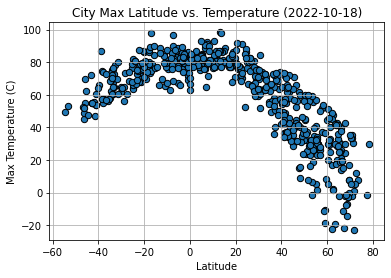

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_plot = city_data_df[["Max Temp","Lat"]]
city_weather_plot = city_data_plot.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, s=40, edgecolor='black')
plt.gca().update(dict(title='City Max Latitude vs. Temperature (2022-10-18)', xlabel="Latitude", ylabel='Max Temperature (C)'))

# Incorporate the other graph properties
plt.gca().update(dict(title='City Max Latitude vs. Temperature (2022-10-18)', xlabel="Latitude", ylabel='Max Temperature (C)'))

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

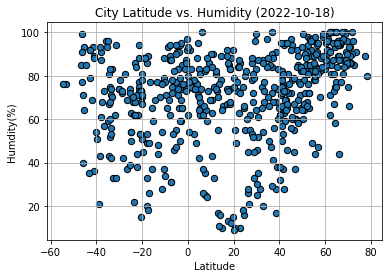

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_plot2 = city_data_df[["Humidity", "Lat"]]
city_weather2_plot = city_data_plot2.plot(kind='scatter', x='Lat', y='Humidity', grid=True, s=40,edgecolor='black')
# Incorporate the other graph properties
plt.gca().update(dict(title='City Latitude vs. Humidity (2022-10-18)', xlabel='Latitude', ylabel='Humdity(%)'))
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

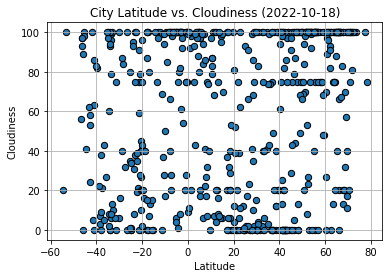

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_plot3 = city_data_df[["Cloudiness","Lat"]]
city_weather3_plot = city_data_plot3.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, s=40, edgecolor='black')

# Incorporate the other graph properties
plt.gca().update(dict(title='City Latitude vs. Cloudiness (2022-10-18)', xlabel='Latitude', ylabel='Cloudiness'))

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

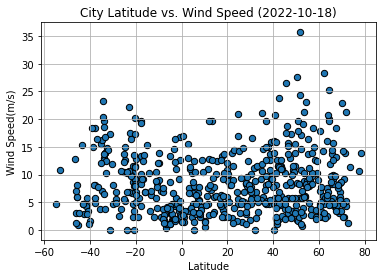

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_plot4 = city_data_df[['Wind Speed','Lat']]
city_weather4_plot = city_data_plot4.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, s=40, edgecolor='black')

# Incorporate the other graph properties
plt.gca().update(dict(title='City Latitude vs. Wind Speed (2022-10-18)', xlabel="Latitude", ylabel="Wind Speed(m/s)"))

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [163]:
# Define a function to create Linear Regression plots
#x_values = city_data_df['Lat']
#y_values = city_data_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


In [164]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,provideniya,64.3833,-173.3000,28.85,93,100,20.07,RU,1667831083
1,port hardy,50.6996,-127.4199,32.18,64,20,19.57,CA,1667831083
2,saint anthony,45.0205,-93.2180,28.45,72,0,10.36,US,1667830497
3,dikson,73.5069,80.5464,7.74,91,100,11.36,RU,1667831084
4,egvekinot,66.3167,-179.1667,24.33,96,100,10.00,RU,1667831084


In [165]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,hobart,-42.8794,147.3294,55.06,92,53,4.61,AU,1667830867
6,castro,-24.7911,-50.0119,63.91,50,0,5.14,BR,1667831084
7,rikitea,-23.1203,-134.9692,72.84,86,100,22.10,PF,1667831085
8,cidreira,-30.1811,-50.2056,64.96,74,6,11.97,BR,1667831085
9,port elizabeth,-33.9180,25.5701,74.10,75,0,19.57,ZA,1667831085


###  Temperature vs. Latitude Linear Regression Plot

[Text(0.5, 1.0, 'Northern Hemisphere: Correlation of Lat & Max Temp is 0.73'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Max Temperature (F)')]

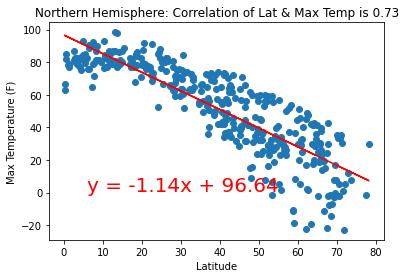

In [210]:
# Linear regression on Northern Hemisphere
(slope_n, intercept_n, rvalue, pvalue, stderr) = linregress(x_values_n, y_values_n)
regress_values_n = x_values_n * slope + intercept

x_values_n = northern_hemi_df['Lat']
y_values_n = northern_hemi_df["Max Temp"]
line_eq_n = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values_n, y_values_n)
plt.plot(x_values_n,regress_values_n,"r-")
plt.annotate(line_eq_n,(5.8,0.8),fontsize=20,color="red")
plt.gca().update(dict(title=f'Northern Hemisphere: Correlation of Lat & Max Temp is {rvalue**2:.2f}',xlabel='Latitude', ylabel='Max Temperature (F)'))


[Text(0.5, 1.0, 'Southern Hemisphere: Correlation of Lat & Max Temp is 0.50'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Max Temperature (F)')]

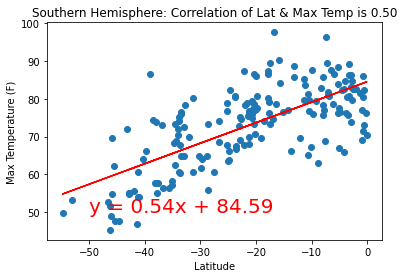

In [177]:
# Linear regression on Southern Hemisphere
(slope_s, intercept_s, rvalue, pvalue, stderr) = linregress(x_values_s, y_values_s)
regress_values_s = x_values_s * slope_s + intercept_s

x_values_s = southern_hemi_df['Lat']
y_values_s = southern_hemi_df["Max Temp"]
line_eq_s = "y = " + str(round(slope_s,2)) + "x + " + str(round(intercept_s,2))

plt.scatter(x_values_s, y_values_s)
plt.plot(x_values_s,regress_values_s,"r-")
plt.annotate(line_eq_s,(-50,50),fontsize=20,color="red")
plt.gca().update(dict(title=f'Southern Hemisphere: Correlation of Lat & Max Temp is {rvalue**2:.2f}', xlabel='Latitude', ylabel='Max Temperature (F)'))


In the northern hemisphere, maximum tempature and latitude are negatively correlated.  That means the higher the latitude, the lower the maximum temperatue.  The Pearson correlation coefficient is strong at 73%.

In the southern hemisphere, maximum temperature and latitude are positively correlated.  That means the higher the maximum temperature, the higher the latitude.  The Pearson correlation coefficient is weak at 50% meaning that there is low correlation.

### Humidity vs. Latitude Linear Regression Plot

[Text(0.5, 1.0, 'Northern Hemisphere: Correlation of Lat & Humidity is 0.16'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Humidity')]

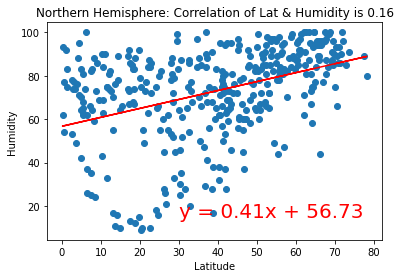

In [203]:
# Northern Hemisphere

x_values_nH = northern_hemi_df['Lat']
y_values_nH = northern_hemi_df["Humidity"]
line_eq_nH = "y = " + str(round(slope_nH,2)) + "x + " + str(round(intercept_nH,2))

(slope_nH, intercept_nH, rvalue_nH, pvalue_nH, stderr_nH) = linregress(x_values_nH, y_values_nH)
regress_values_nH = x_values_nH * slope_nH + intercept_nH

plt.scatter(x_values_nH, y_values_nH)
plt.plot(x_values_nH,regress_values_nH,"r-")
plt.annotate(line_eq_nH,(30,15),fontsize=20,color="red")
plt.gca().update(dict(title=f'Northern Hemisphere: Correlation of Lat & Humidity is {rvalue_nH**2:.2f}',xlabel='Latitude', ylabel='Humidity'))


[Text(0.5, 1.0, 'Southern Hemisphere: Correlation of Lat & Humidity is 0.0011'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Humidity')]

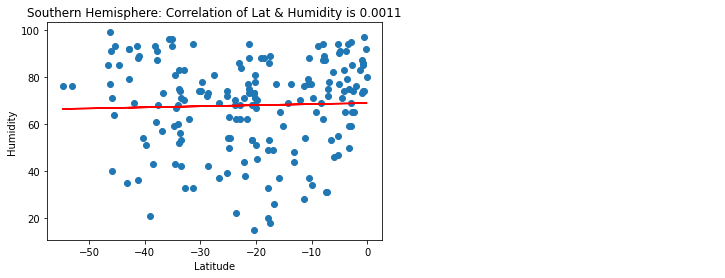

In [204]:
# Southern Hemisphere

(slope_sH, intercept_sH, rvalue_sH, pvalue_sH, stderr_sH) = linregress(x_values_sH, y_values_sH)
regress_values_sH = x_values_sH * slope_sH + intercept_sH

x_values_sH = southern_hemi_df['Lat']
y_values_sH = southern_hemi_df["Humidity"]
line_eq_sH = "y = " + str(round(slope_sH,2)) + "x + " + str(round(intercept_sH,2))



plt.scatter(x_values_sH, y_values_sH)
plt.plot(x_values_sH,regress_values_sH,"r-")
plt.annotate(line_eq_sH,(30,15),fontsize=20,color="red")
plt.gca().update(dict(title=f'Southern Hemisphere: Correlation of Lat & Humidity is {rvalue_sH**2:.4f}',xlabel='Latitude', ylabel='Humidity'))


In the northern hemisphere, humidity and latitude are positively correlated.  The Pearson correlation coefficient is weak. 

In the southern hemisphere, humidity and latitude have no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

[Text(0.5, 1.0, 'Northern Hemisphere: Correlation of Lat & Cloudiness is 0.05'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Cloudiness')]

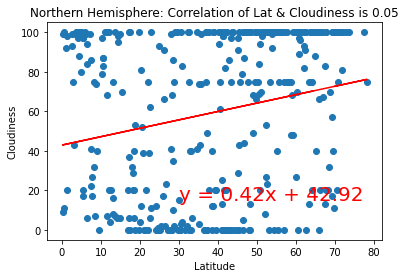

In [213]:
# Northern Hemisphere
(slope_nC, intercept_nC, rvalue_nC, pvalue_nC, stderr_nC) = linregress(x_values_nC, y_values_nC)
regress_values_nC = x_values_nC * slope_nC + intercept_nC

x_values_nC = northern_hemi_df['Lat']
y_values_nC = northern_hemi_df["Cloudiness"]
line_eq_nC = "y = " + str(round(slope_nC,2)) + "x + " + str(round(intercept_nC,2))


plt.scatter(x_values_nC, y_values_nC)
plt.plot(x_values_nC,regress_values_nC,"r-")
plt.annotate(line_eq_nC,(30,15),fontsize=20,color="red")
plt.gca().update(dict(title=f'Northern Hemisphere: Correlation of Lat & Cloudiness is {rvalue_nC**2:.2f}',xlabel='Latitude', ylabel='Cloudiness'))


[Text(0.5, 1.0, 'Southern Hemisphere: Correlation of Lat & Cloudiness is 0.06'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Cloudiness')]

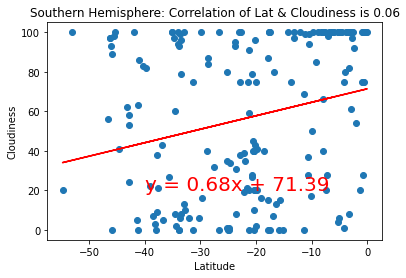

In [224]:
# Southern Hemisphere

x_values_sC = southern_hemi_df['Lat']
y_values_sC = southern_hemi_df["Cloudiness"]

(slope_sC, intercept_sC, rvalue_sC, pvalue_sC, stderr_sC) = linregress(x_values_sC, y_values_sC)
regress_values_sC = x_values_sC * slope_sC + intercept_sC

line_eq_sC = "y = " + str(round(slope_sC,2)) + "x + " + str(round(intercept_sC,2))


plt.scatter(x_values_sC, y_values_sC)
plt.plot(x_values_sC,regress_values_sC,"r-")
plt.annotate(line_eq_sC,(-40,20),fontsize=20,color="red")
plt.gca().update(dict(title=f'Southern Hemisphere: Correlation of Lat & Cloudiness is {rvalue_sC**2:.2f}',xlabel='Latitude', ylabel='Cloudiness'))

In the northern hemisphere, cloudiness and latitude are positively correlated.  The Pearson correlation coefficient is weak (low). 

In the southern hemisphere, cloudiness and latitude is also positively correlated. The Pearson correlation coefficient is weak (low). 

### Wind Speed vs. Latitude Linear Regression Plot

[Text(0.5, 1.0, 'Northern Hemisphere: Correlation of Lat & Wind Speed is 0.03'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Wind Speed')]

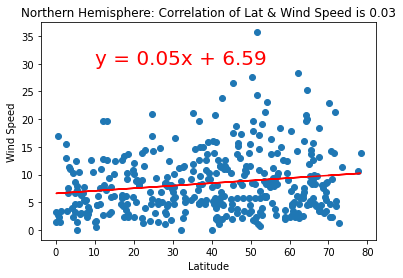

In [230]:
# Northern Hemisphere
x_values_nW = northern_hemi_df['Lat']
y_values_nW = northern_hemi_df["Wind Speed"]

(slope_nW, intercept_nW, rvalue_nW, pvalue_nW, stderr_nW) = linregress(x_values_nW, y_values_nW)
regress_values_nW = x_values_nW * slope_nW + intercept_nW

line_eq_nW = "y = " + str(round(slope_nW,2)) + "x + " + str(round(intercept_nW,2))



plt.scatter(x_values_nW, y_values_nW)
plt.plot(x_values_nW,regress_values_nW,"r-")
plt.annotate(line_eq_nW,(10,30),fontsize=20,color="red")
plt.gca().update(dict(title=f'Northern Hemisphere: Correlation of Lat & Wind Speed is {rvalue_nW**2:.2f}',xlabel='Latitude', ylabel='Wind Speed'))


[Text(0.5, 1.0, 'Southern Hemisphere: Correlation of Lat & Wind Speed is 0.04'),
 Text(0.5, 0, 'Latitude'),
 Text(0, 0.5, 'Wind Speed')]

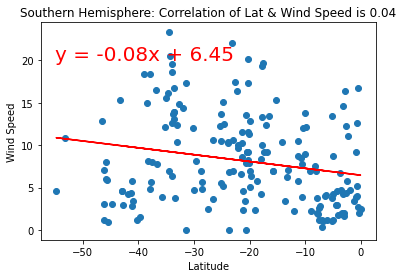

In [235]:
# Southern Hemisphere
x_values_sW = southern_hemi_df['Lat']
y_values_sW = southern_hemi_df["Wind Speed"]

(slope_sW, intercept_sW, rvalue_sW, pvalue_sW, stderr_sW) = linregress(x_values_sW, y_values_sW)
regress_values_sW = x_values_sW * slope_sW + intercept_sW

line_eq_sW = "y = " + str(round(slope_sW,2)) + "x + " + str(round(intercept_sW,2))



plt.scatter(x_values_sW, y_values_sW)
plt.plot(x_values_sW,regress_values_sW,"r-")
plt.annotate(line_eq_sW,(-55,20),fontsize=20,color="red")
plt.gca().update(dict(title=f'Southern Hemisphere: Correlation of Lat & Wind Speed is {rvalue_sW**2:.2f}',xlabel='Latitude', ylabel='Wind Speed'))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
In the northern hemisphere, cloudiness and wind speed are slightly, positively correlated.  The Pearson correlation coefficient is weak (low). 

In the southern hemisphere, cloudiness and latitude is also slightly, negatively correlated. The Pearson correlation coefficient is weak (low).